In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

1.14.0


In [ ]:
batch_size=128
num_class=10


In [ ]:
IMG_HEIGHT=28
IMG_WIDTH=28

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train.reshape(x_train.shape[0],IMG_HEIGHT,IMG_WIDTH,1)
x_test=x_test.reshape(x_test.shape[0],IMG_HEIGHT,IMG_WIDTH,1)

input_shape=(IMG_HEIGHT,IMG_WIDTH,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                              input_shape=input_shape,name='input_layer'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_1'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Dropout(0.25,name='dropout_1'))

model.add(tf.keras.layers.Flatten(name='flate_1'))

model.add(tf.keras.layers.Dense(128,activation='relu',name='dense_1'))
model.add(tf.keras.layers.Dropout(0.5,name='dropout_2'))

model.add(tf.keras.layers.Dense(num_class,activation='softmax',name='output_layer'))

model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=5,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.2403 - acc: 0.9274 - val_loss: 0.0633 - val_acc: 0.9803
Epoch 2/5
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.0868 - acc: 0.9747 - val_loss: 0.0417 - val_acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.0644 - acc: 0.9803 - val_loss: 0.0336 - val_acc: 0.9890
Epoch 4/5
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.0534 - acc: 0.9840 - val_loss: 0.0315 - val_acc: 0.9906
Epoch 5/5
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0330 - val_acc: 0.9889


In [ ]:
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 6s 635us/sample - loss: 0.0330 - acc: 0.9889
Test loss 0.03301563676322985
Test accuracy 0.9889


In [ ]:
model.layers[0]._name='conv_0'
print(model.layers[0].name)

model.summary()

conv_0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_1 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flate_1 (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)         

In [ ]:
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 6s 635us/sample - loss: 0.0330 - acc: 0.9889
Test loss 0.03301563676322985
Test accuracy 0.9889


In [ ]:
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(x_train[2].reshape(1,28,28,1))
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1


(1, 26, 26, 32)


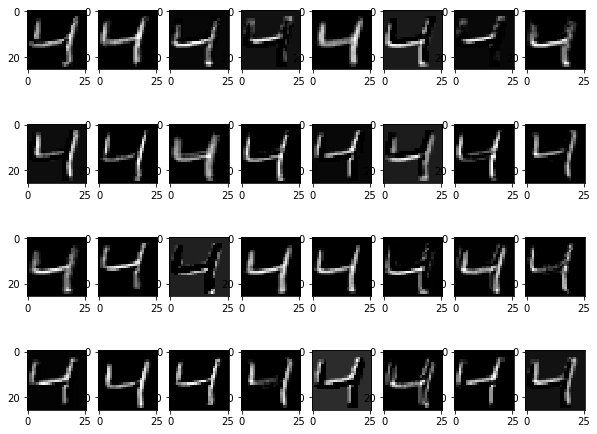

In [ ]:
visualize_conv_layer('conv_0')

(1, 24, 24, 64)


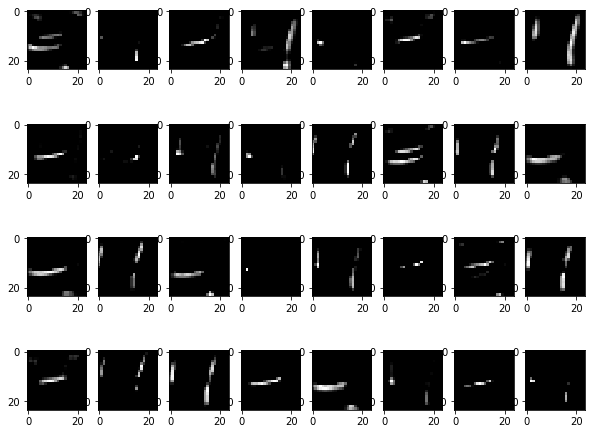

In [ ]:
visualize_conv_layer('conv_1')